# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 34 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, linkage='single'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        return

    # Метрики расстояний: наименьшее, наибольшее, пропорциональное среднее
    def __complete(self, dist):
        return max(dist)

    def __single(self, dist):
        return min(dist)

    def __average(self, l_dist, l_size, r_dist, r_size):
        return (l_dist * l_size + r_dist * r_size) / (l_size + r_size)

    def __update_dist(self, distances, l_idx, r_idx, measure, labels):
        # В таблице расстояний объединяем первую (левую) и вторую (правую) строки и столбцы соответсвенно 
        if measure == self.__single or measure == self.__complete:
            for r in distances:
                r[l_idx] = measure((r[l_idx], r[r_idx]))
            distances[l_idx] = map(measure, zip(distances[l_idx], distances[r_idx]))

        else:
            for r in distances:
                r[l_idx] = measure(r[l_idx], len(labels[l_idx]), r[r_idx], len(labels[r_idx]))
            distances[l_idx] = [measure(distances[l_idx][i], len(labels[l_idx]), distances[r_idx][i], len(labels[r_idx]))
                           for i in range(len(distances[l_idx]))]

        # Удаляем строку и столбец второго кластера
        distances = np.delete(np.delete(distances, r_idx, 0), r_idx, 1)
        return distances

    def __fill_labels(self, dist, n):
        linkage_methods = {'single': self.__single, 'complete': self.__complete, 'average': self.__average}
        clusters = [[i] for i in range(n)]

        for k in range(n - self.n_clusters):
            np.fill_diagonal(dist, 'inf')

            # Находим два кластера с минимальным расстоянием
            idx = dist.argmin()
            i, j = idx / dist.shape[0], idx % dist.shape[1]

            # Обновляем матрицу расстояний
            dist = self.__update_dist(dist, i, j, linkage_methods[self.linkage], clusters)

            # Добавляем элементы второго кластера в первый (из двух наденных)
            clusters[i] = [x for x in clusters[i] + clusters.pop(j)]

        # Заполняем метки на основе полученных кластеров
        for l, cluster in enumerate(clusters):
            for idx in cluster:
                self.labels[idx] = l
        return

    def fit(self, X, y=None):
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Функция аггломеративной кластеризации. На вход подается матрица растояний
        self.__fill_labels(ss.distance.cdist(X, X), X.shape[0])

        return self

    def predict(self, X):
        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

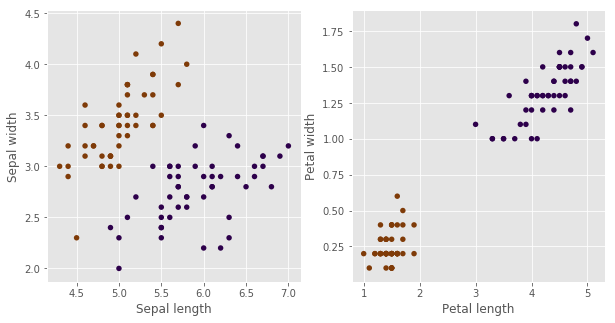

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
pred_iris = Clustering(2, 'single').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [7]:
pred_iris = Clustering(2, 'complete').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [8]:
pred_iris = Clustering(2, 'average').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

Реализован метод Silhouette, как наилучший для анализа кластеризации

In [9]:
## Задание 2
def quality(X, y):
    
    # Матрица расстояний
    dist = ss.distance.cdist(X, X)
    
    # Сохраняем уникальные метки (число кластеров)
    unique, counts = numpy.unique(y, return_counts=True)
    n_labels= len(unique)
    
    # Среднее расстояние от каждой точки до свого класера и до ближайшего
    intra_dist = np.zeros(X.shape[0])
    near_dist = np.full(X.shape[0], np.inf)
    
    for i, label in enumerate(unique):
        # Все расстояния от текущей точки
        dist_for_label = dist[y == label]
        
        # Берем среднее по текущему кластеру
        intra_dist[y == label] = np.sum(dist_for_label[:,y == label], axis = 1) / counts[i]
        
        # Для всех других кластеров вичислим минимум по всем средним расстояниям
        for j, other in enumerate(unique):
            if other != label:
                dist_to_other = np.mean(dist_for_label[:, y == other], axis=1)
                near_dist[y == label] = np.minimum(near_dist[y == label], dist_to_other)
    
    # Вычислим силуэт для каждой точки
    sil = (near_dist - intra_dist) / np.maximum(near_dist, intra_dist)
    return sil

# Метод возвращает средние силуэт по всем точкам, чем ближе к 1 - тем лучше
def quality_mean(X, y):
    return mean(quality(X,y))

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

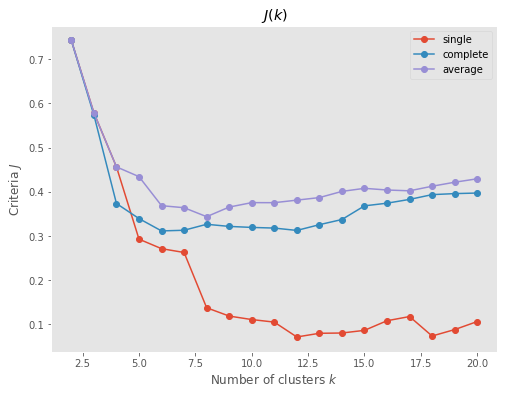

In [10]:
ks = range(2, 21)
criteria_s = np.zeros(len(ks))
criteria_c = np.zeros(len(ks))
criteria_a = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='single')
    y = cls.fit_predict(x_iris)
    criteria_s[i] = quality_mean(x_iris, y)

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='complete')
    y = cls.fit_predict(x_iris)
    criteria_c[i] = quality_mean(x_iris, y)

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='average')
    y = cls.fit_predict(x_iris)
    criteria_a[i] = quality_mean(x_iris, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria_s, marker = 'o',label = 'single')
pl.plot(ks, criteria_c, marker = 'o',label = 'complete')
pl.plot(ks, criteria_a, marker = 'o',label = 'average')
plt.legend()
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Ожидаемо лучший результат при n_clusters = 2

In [11]:
## Задание 3

Загрузим данные

In [12]:
raw_data = pd.read_csv('WDIData.csv', sep=',')
raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


Удалим данные, которые не относятся к самим странам

In [13]:
df_croped = raw_data.drop(range(72991), axis = 0)
df_croped.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
72991,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72992,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72993,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.774789,19.365638,18.955386,18.544137,18.132025,17.719179,17.305714,NaN,NaN,NaN
72994,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,47.888466,42.700000,61.514420,69.100000,75.154373,89.500000,NaN,NaN,NaN
72995,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.500000,39.877850,32.400000,54.988701,63.800000,70.129379,87.800000,NaN,NaN,NaN


Сформируем список всех стран

In [14]:
countries = unique(df_croped['Country Name'].as_matrix())

Т.к. данных по каждому году мало (в лучшем случае немного больше половины),то становится трудно их кластеризовать и интерпретировать. Поэтому возьмем среднее по каждому параметру по всем годам (можно брать 200-2016, существенно ничего не поменяется)

In [15]:
df_mean = pd.DataFrame()
for country in countries:
    df_mean[country] = pd.DataFrame(df_croped.loc[df_croped['Country Name'] == country].mean(1).as_matrix(),
                                index=range(1553),columns=[countries[0]])

In [16]:
data = df_mean.fillna(0).transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552
Afghanistan,15.13216,16.709670,20.125550,33.680401,31.519567,80.985768,9.483007,9.483007,3.214328,3.741041,...,0.000000,32.6,85.2,59.2,18.20,66.9,48.40,33.4,36.75,27.050220
Albania,43.63988,55.653665,57.698713,100.000000,100.000000,100.000000,33.127240,33.127240,28.133420,21.388165,...,87.031312,58.8,29.8,10.4,3.75,17.8,20.65,8.8,8.55,28.972691
Algeria,31.80737,38.739440,97.910449,97.109370,95.884123,100.000000,41.880950,41.880950,30.239130,29.021710,...,86.858165,0.0,59.0,0.0,0.00,0.0,0.00,0.0,2.15,37.787026
American Samoa,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.000000
Andorra,0.00000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.000000


Нормализуем данные

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

С помоцью силуэта посмотрим, какие параметры подходят лучше

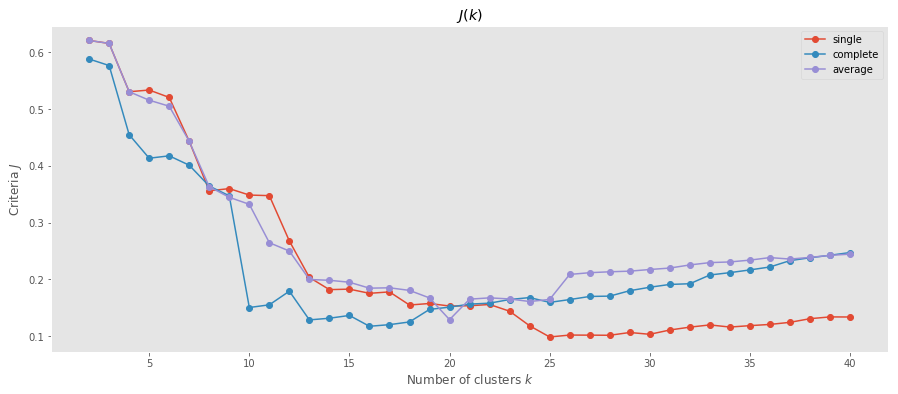

In [18]:
ks = range(2, 41)
criteria = np.zeros(len(ks))
pl.figure(figsize=(15, 6))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='single')
    y = cls.fit_predict(X)
    criteria[i] = quality_mean(X, y)

pl.plot(ks, criteria, marker = 'o',label = 'single')

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='complete')
    y = cls.fit_predict(X)
    criteria[i] = quality_mean(X, y)

pl.plot(ks, criteria, marker = 'o',label = 'complete')

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, linkage='average')
    y = cls.fit_predict(X)
    criteria[i] = quality_mean(X, y)

pl.plot(ks, criteria, marker = 'o',label = 'average')

plt.legend()
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Кажется, что лучше всего алгоритмы работают при n_clusters < 10, но на самом деле это не так. 

Тут проявляются недостатки силуэта, а именно его среднего. Например в методе 'average' второй значимый кластер появляется только при n_clusters = 10. До этого момента в разбиении присутствует один большой кластер, а в остальных по 1-2м элементам. При этом средний силуэт получается большим. 

В таком случае лучше смотреть на действительные силуэты (из-за большого объема они приведены в самом конце). Это позволит точнее определить необходимое число кластеров. Но и по таким графикам тоже можно делать предположения, надо искать точки прироста после спадов. В данном случае для алгоритма 'complete' такими точками являются n_clusters = 12 и n_clusters = 19.

Алгоритм 'complete' был выбран методом пристального взгляда на полученные кластеры при разных алгоритмах. Т.к. этот выбор противоречит среднему значению силуэта, можно сделать вывод, что метрика была выбрани неудачно.

Также стоит отметить, что лучше всего себя показывает метод Уорда, реализация которого не была включена в задание.

Запустим алгоритм с выбранными параметрами

In [19]:
%time labels = Clustering(n_clusters=19, linkage='complete').fit_predict(X)

Wall time: 121 ms


Теперь с помощью метрики T-SNE отобразим все страны и в качестве подписей возьмем полученные значения из labels

In [20]:
tsne = TSNE(random_state=17)
tsne_representation_mean = tsne.fit_transform(X)

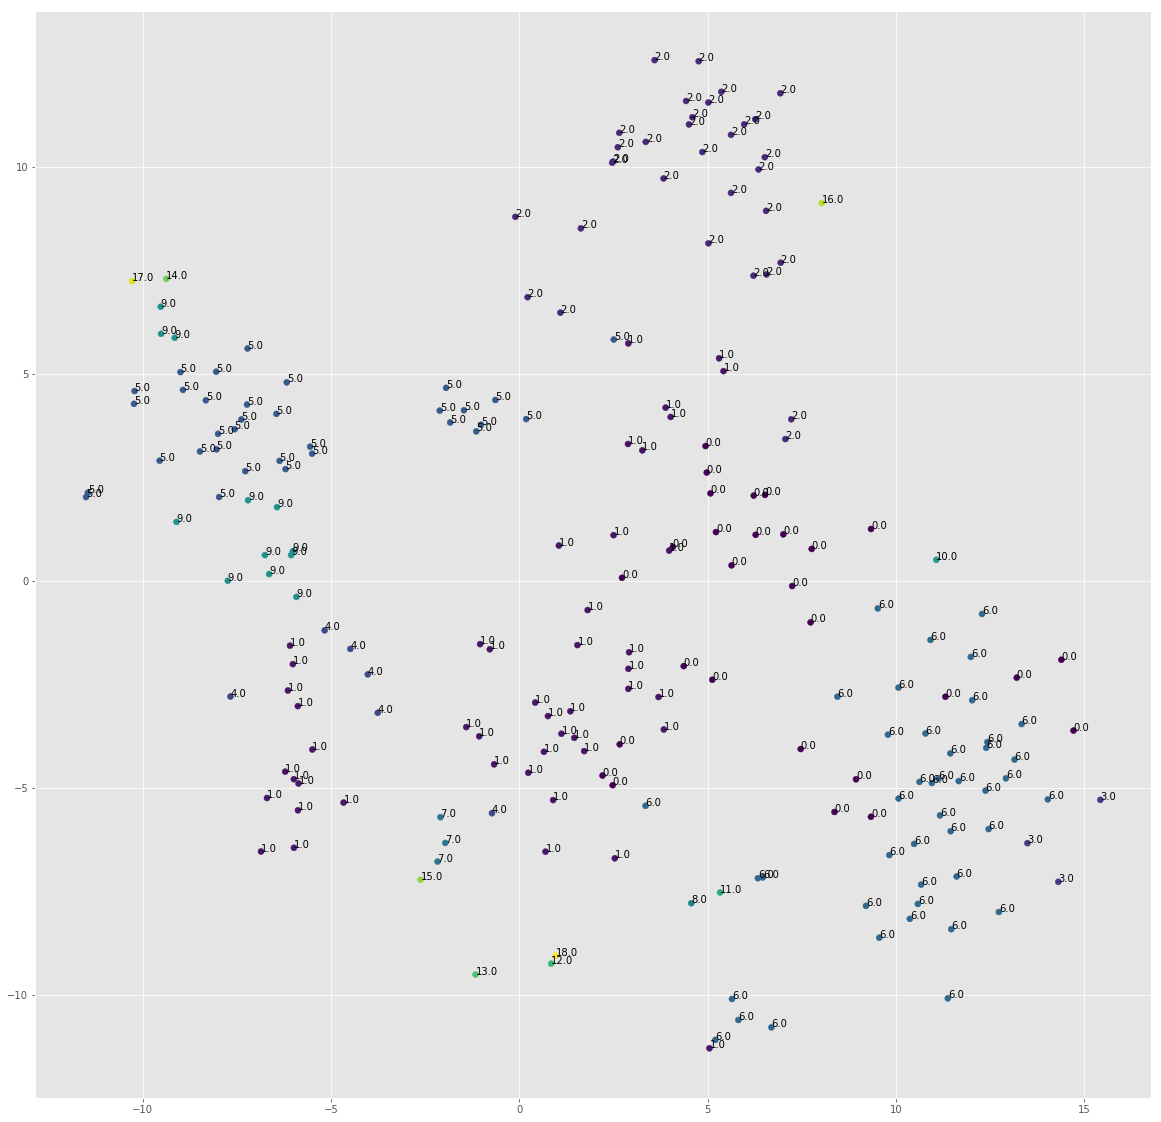

In [21]:
pl.figure(figsize=(20, 20))
plt.scatter(tsne_representation_mean[:, 0], tsne_representation_mean[:, 1], c = labels);
for i in range(217):
    plt.annotate(labels[i], (tsne_representation_mean[i, 0], tsne_representation_mean[i, 1]))

In [22]:
## Задание 4

Проанализируем полученные кластеры.

Для этого выведем то же представление, но уже с названиями стран в качестве меток.

In [23]:
# Удаляем у Кореи символ в названии, который не пачатается на графике
countries[102] = 'Korea, Dem. Peoples Rep.'

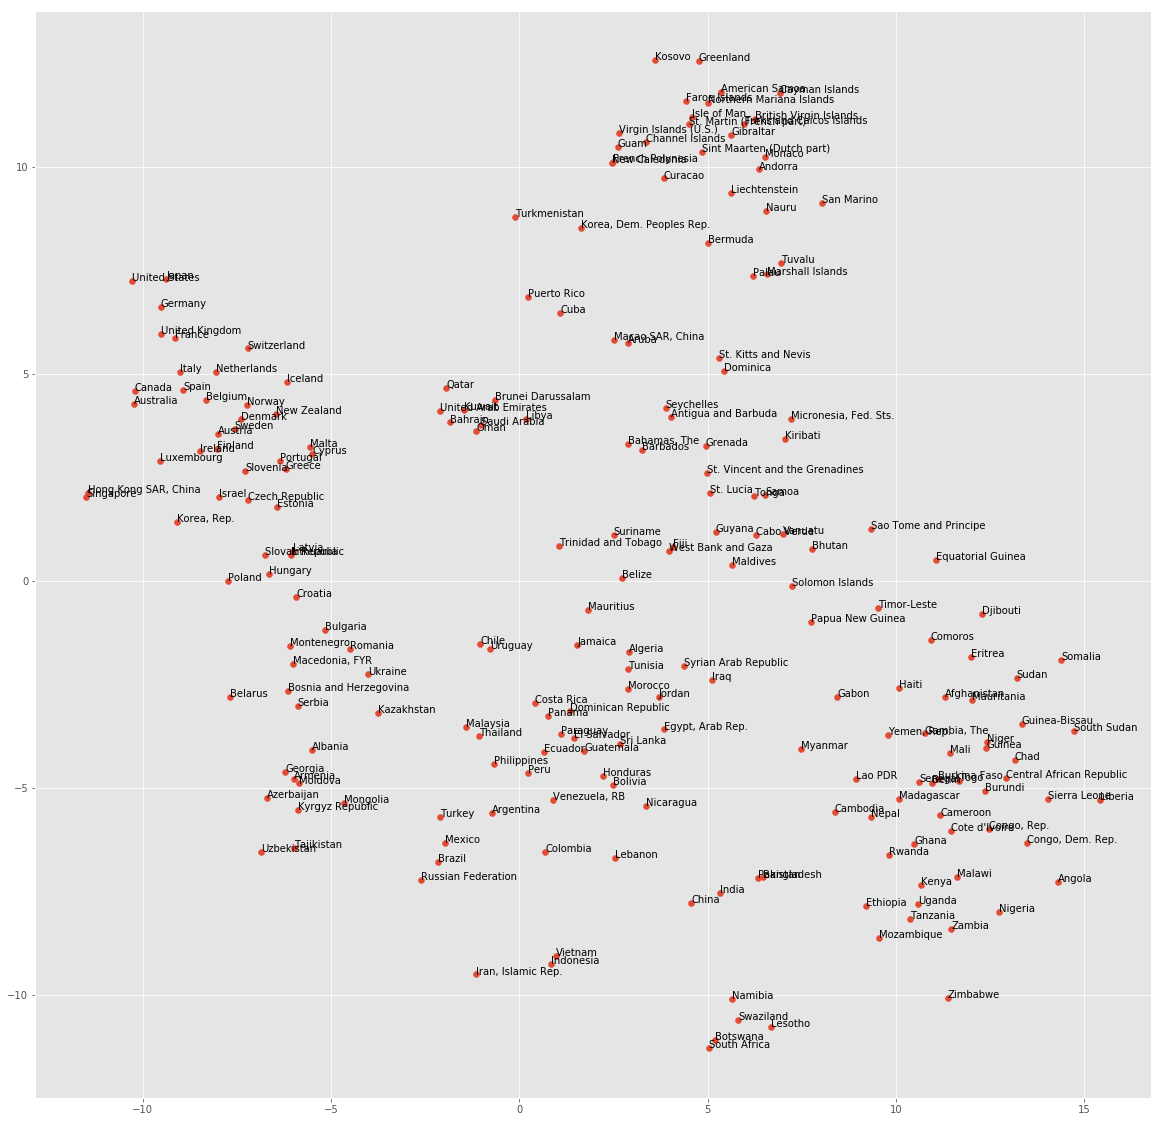

In [24]:
pl.figure(figsize=(20, 20))
plt.scatter(tsne_representation_mean[:, 0], tsne_representation_mean[:, 1]);
for i in range(217):
    plt.annotate(countries[i], (tsne_representation_mean[i, 0], tsne_representation_mean[i, 1]))

Как мы видим, алгоритм смог выделить несколько больших кластеров.

Кластер 00 (6,1) - небольшие страны Южной америки/Карибского бассейна 

Кластер 01 (1,-4) - богатые страны третьего мира (условно), Южная Америка, СНГ и пр.

Кластер 02 (5,10) - небольшие страны или острова-страны

Кластер 05 (-7,4) - развитые (в большинсве европейские) страны

Кластер 06 (12,-5) - бедные страны Африки

Кластер 09 (-6,1) - страны Восточной Европы

Ниже выведены силуэты для 'complete, для числа кластеров 2-25. И становится понятно, чем обусловлен выбор числа 19, хотя и сами силуэты в категории 'плохих'.

*код ниже является копий с сайта sclearn и приведен исключительно для демонстрации*

('For n_clusters =', 2, 'The average silhouette_score is :', 0.5880861530061392)


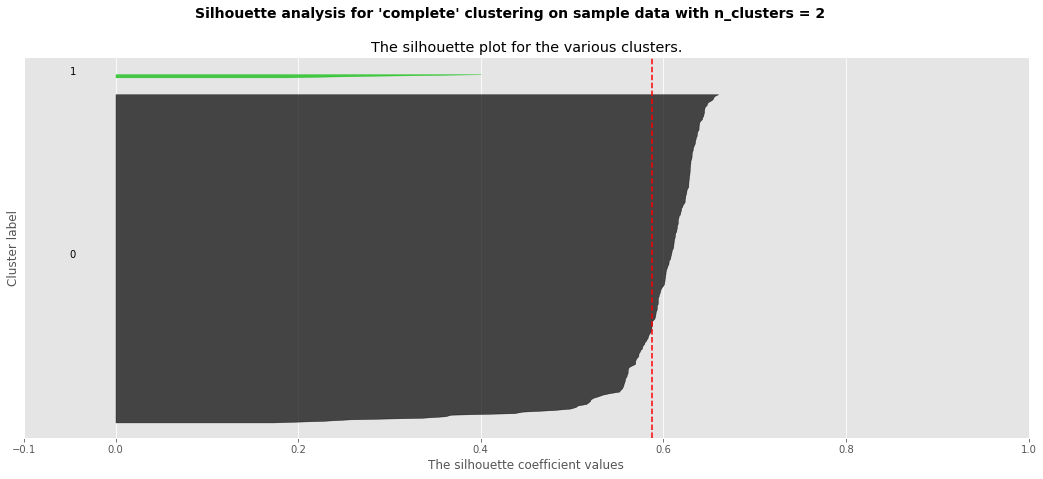

('For n_clusters =', 3, 'The average silhouette_score is :', 0.57660011287651836)


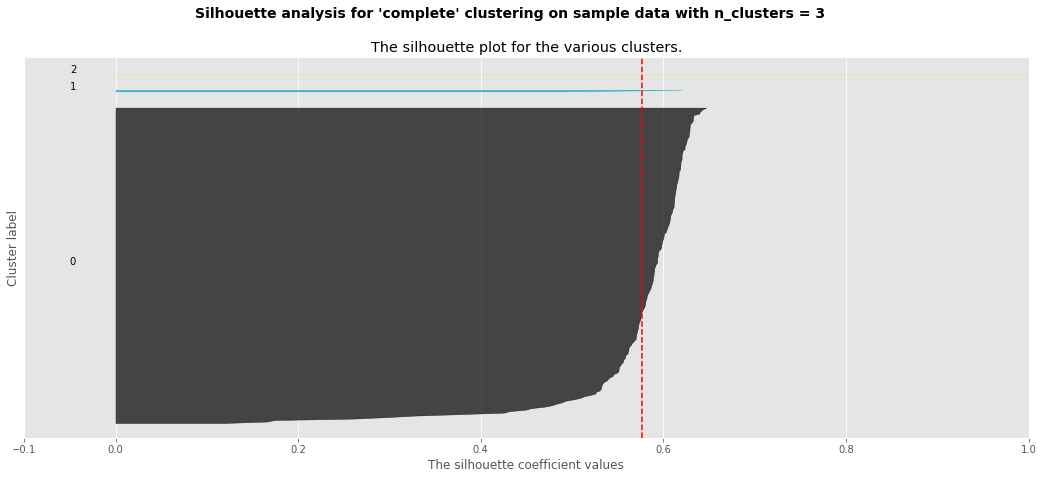

('For n_clusters =', 4, 'The average silhouette_score is :', 0.45484621908495437)


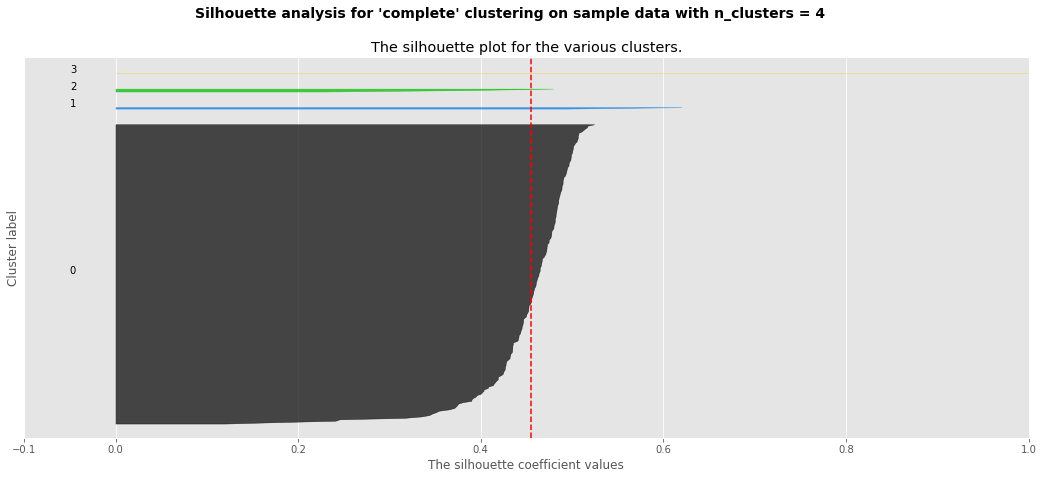

('For n_clusters =', 5, 'The average silhouette_score is :', 0.41347184995702979)


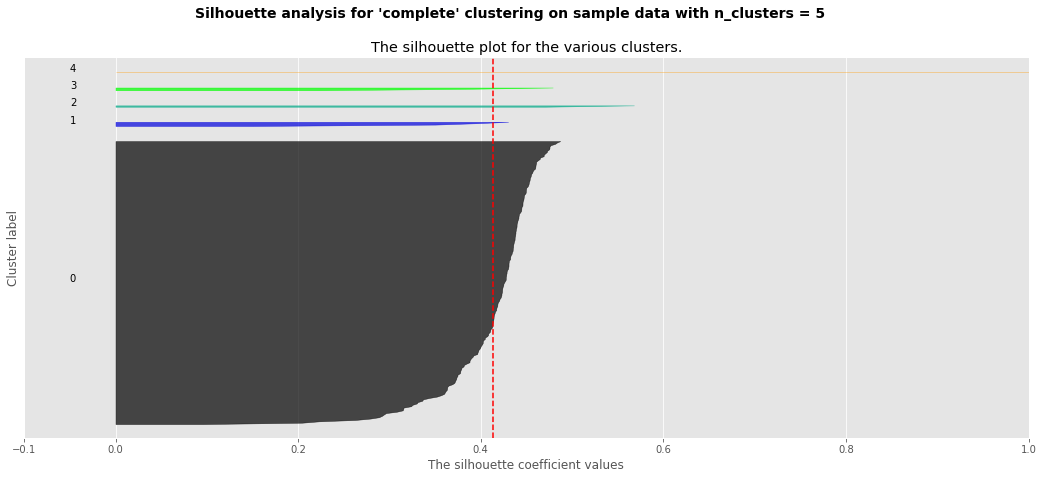

('For n_clusters =', 6, 'The average silhouette_score is :', 0.41767251745941569)


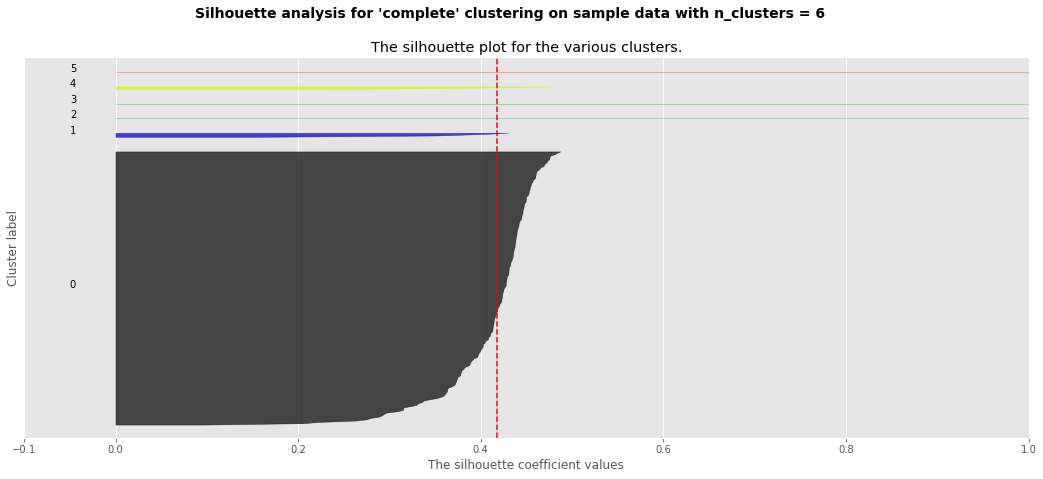

('For n_clusters =', 7, 'The average silhouette_score is :', 0.40116319519346733)


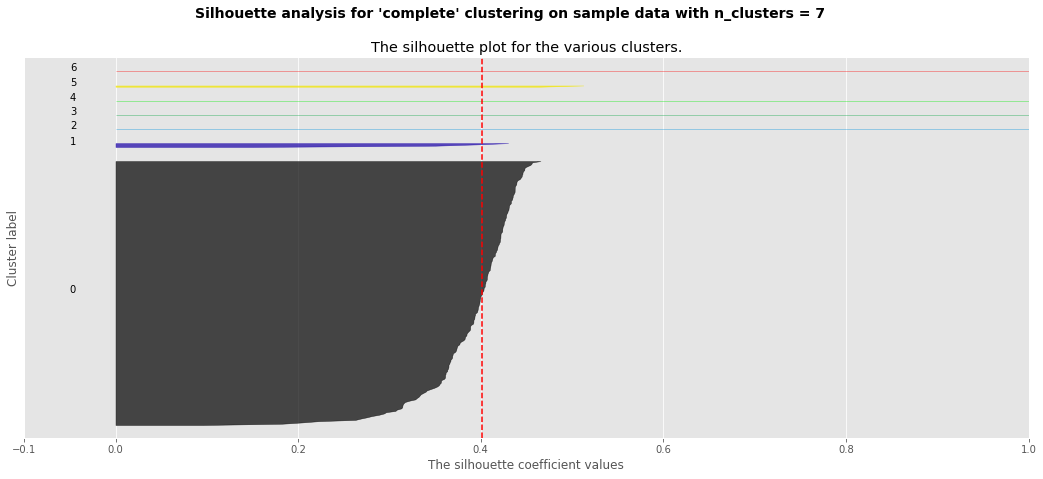

('For n_clusters =', 8, 'The average silhouette_score is :', 0.36440214191845827)


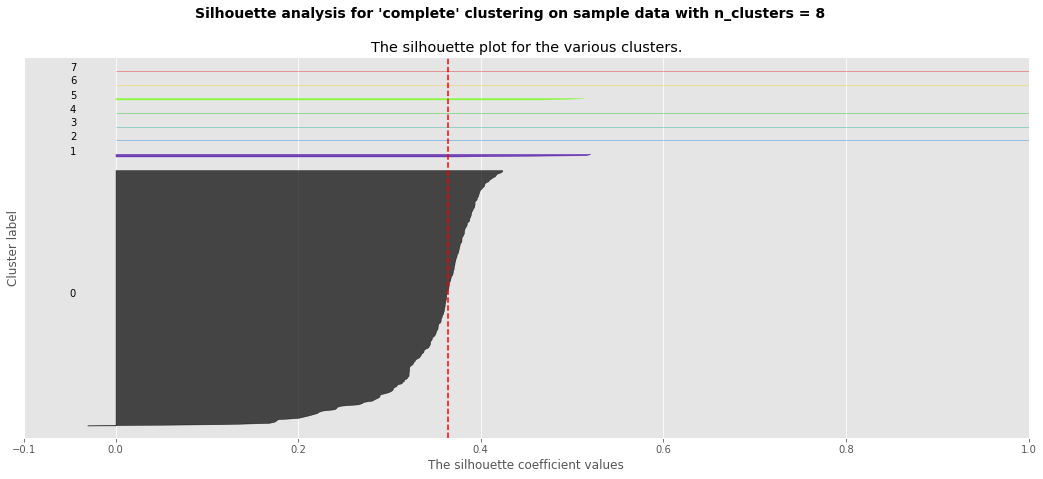

('For n_clusters =', 9, 'The average silhouette_score is :', 0.3473273253886649)


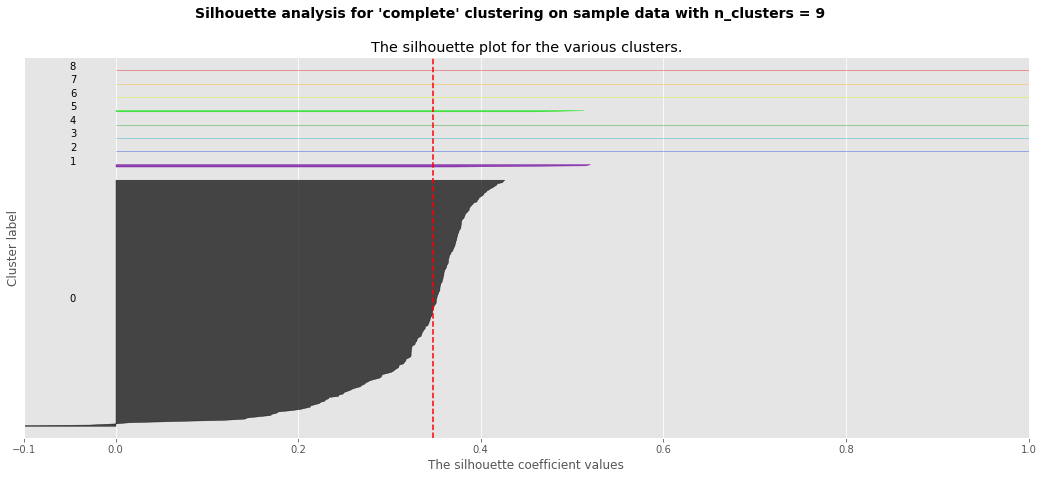

('For n_clusters =', 10, 'The average silhouette_score is :', 0.15068040048160392)


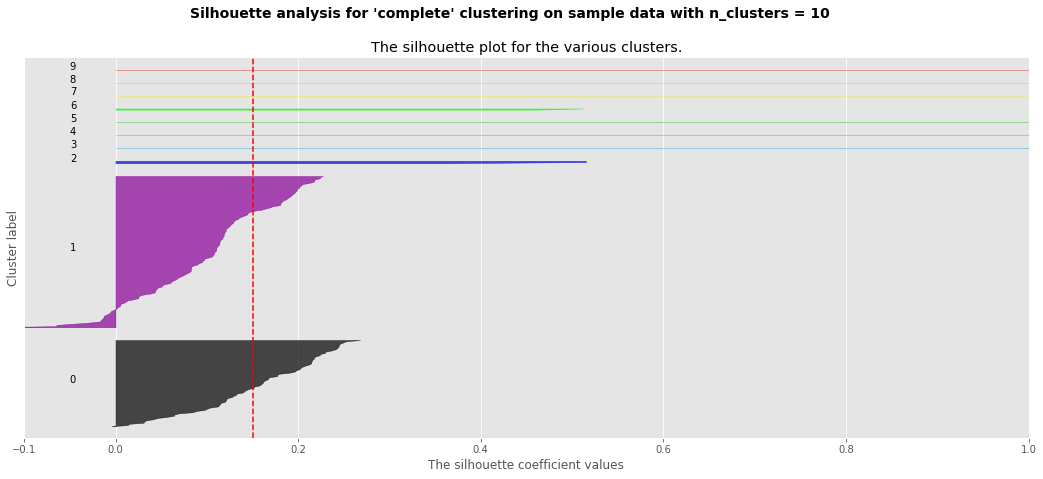

('For n_clusters =', 11, 'The average silhouette_score is :', 0.15541105865242852)


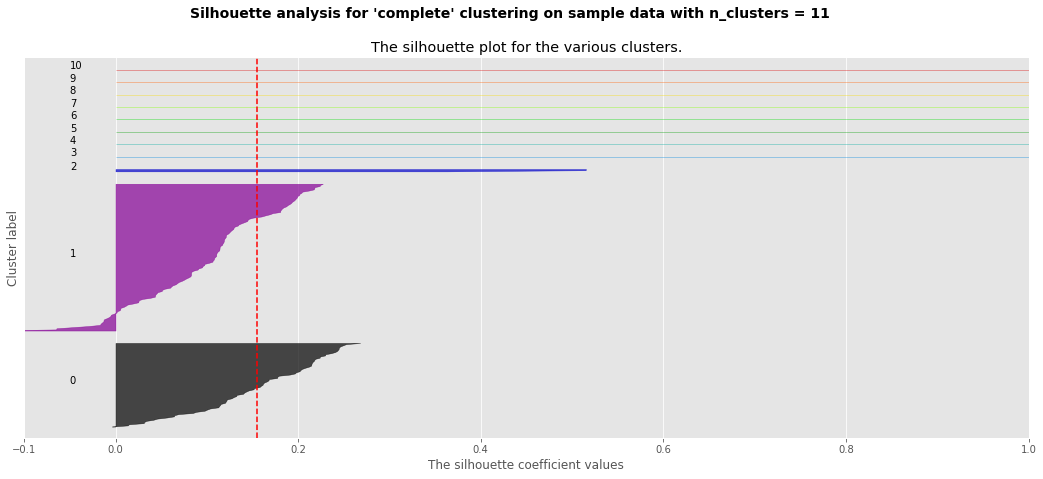

('For n_clusters =', 12, 'The average silhouette_score is :', 0.17942296100263133)


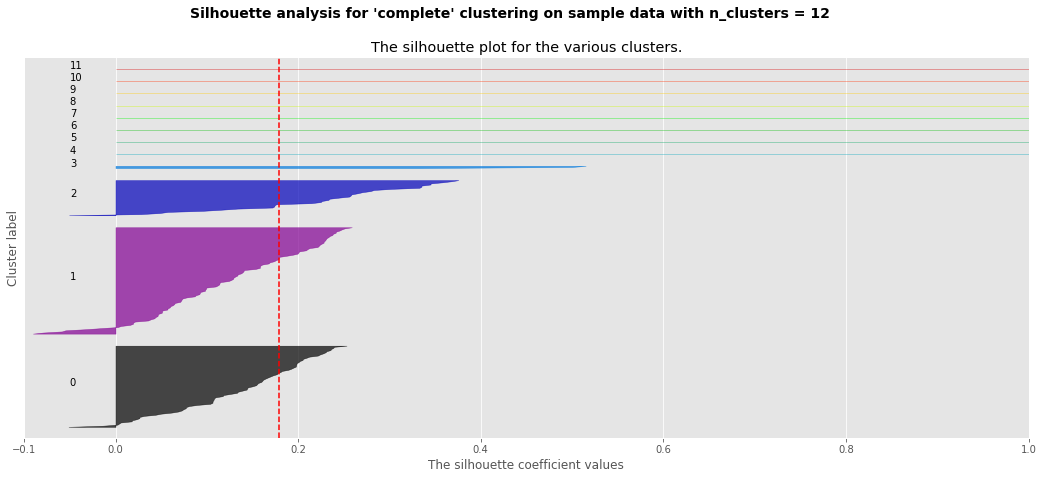

('For n_clusters =', 13, 'The average silhouette_score is :', 0.12886996663188188)


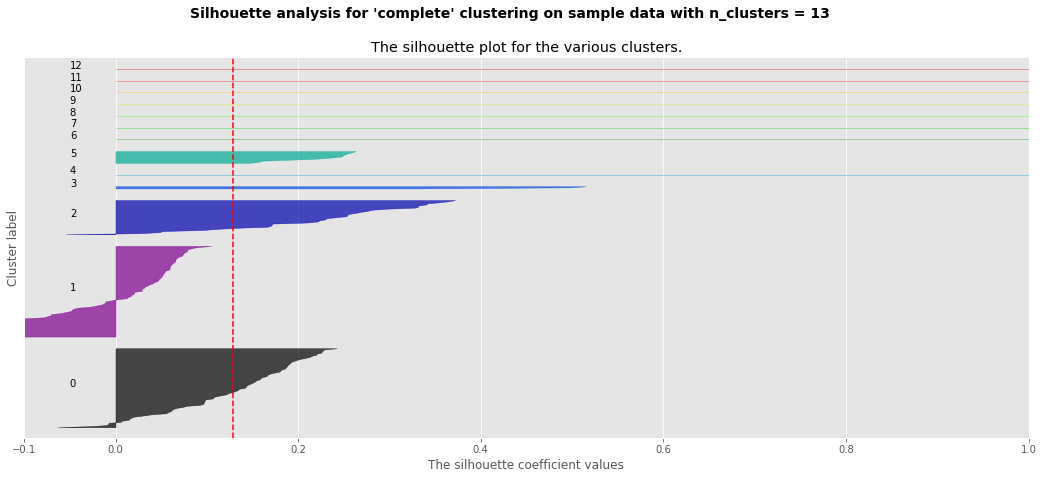

('For n_clusters =', 14, 'The average silhouette_score is :', 0.13181111379406205)


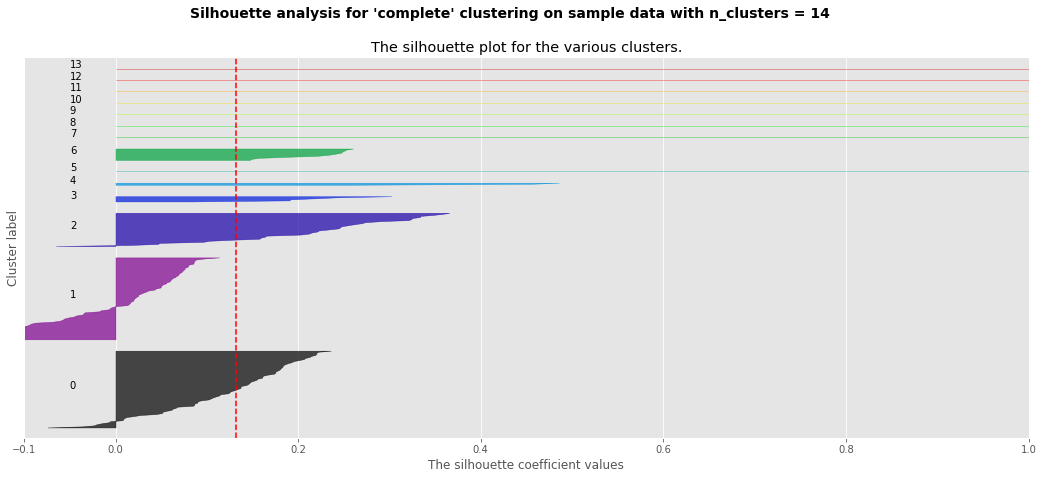

('For n_clusters =', 15, 'The average silhouette_score is :', 0.13670707291035616)


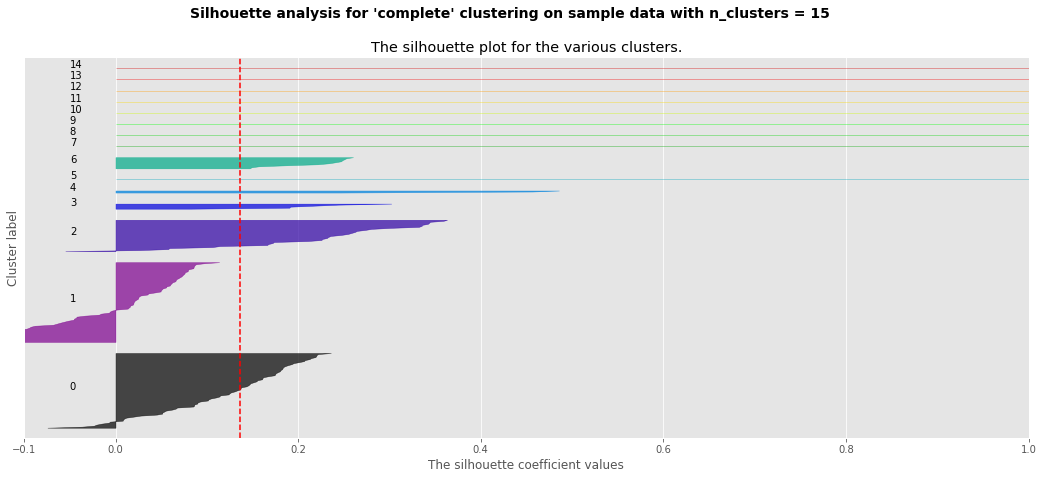

('For n_clusters =', 16, 'The average silhouette_score is :', 0.11764127006071917)


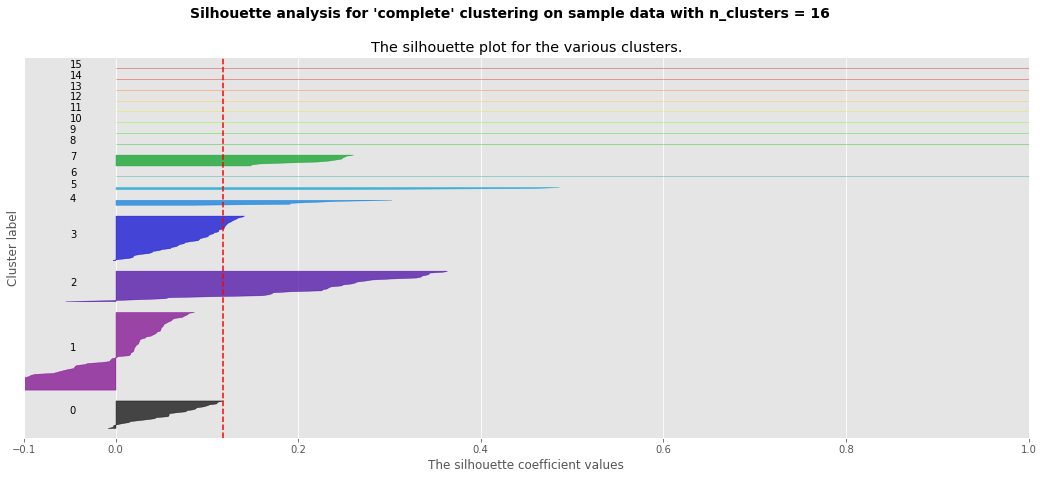

('For n_clusters =', 17, 'The average silhouette_score is :', 0.1204982291367397)


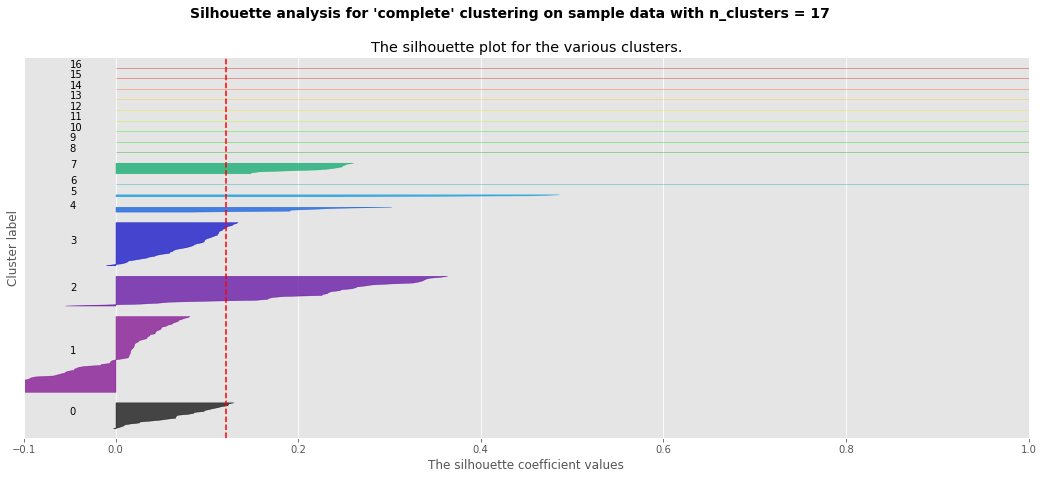

('For n_clusters =', 18, 'The average silhouette_score is :', 0.12526645153682761)


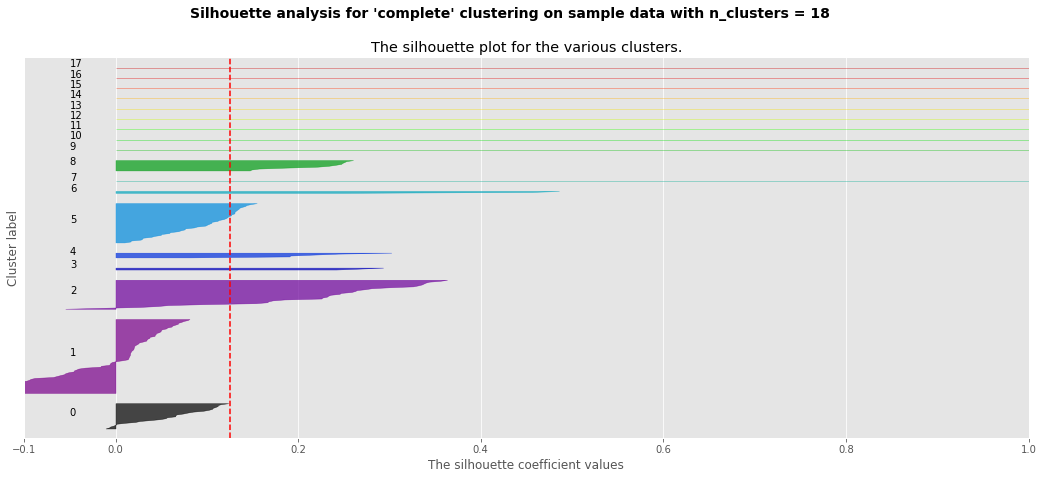

('For n_clusters =', 19, 'The average silhouette_score is :', 0.14737723309083939)


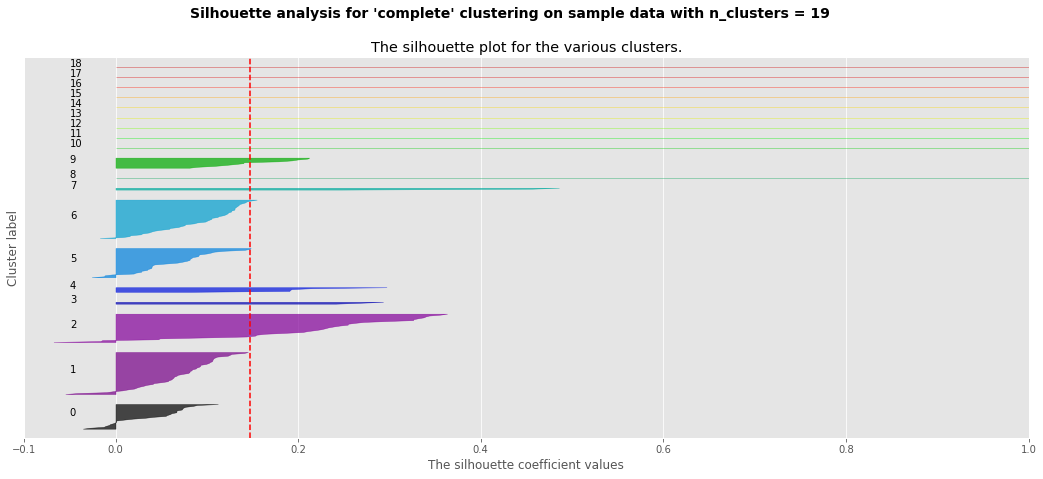

('For n_clusters =', 20, 'The average silhouette_score is :', 0.15133310992384702)


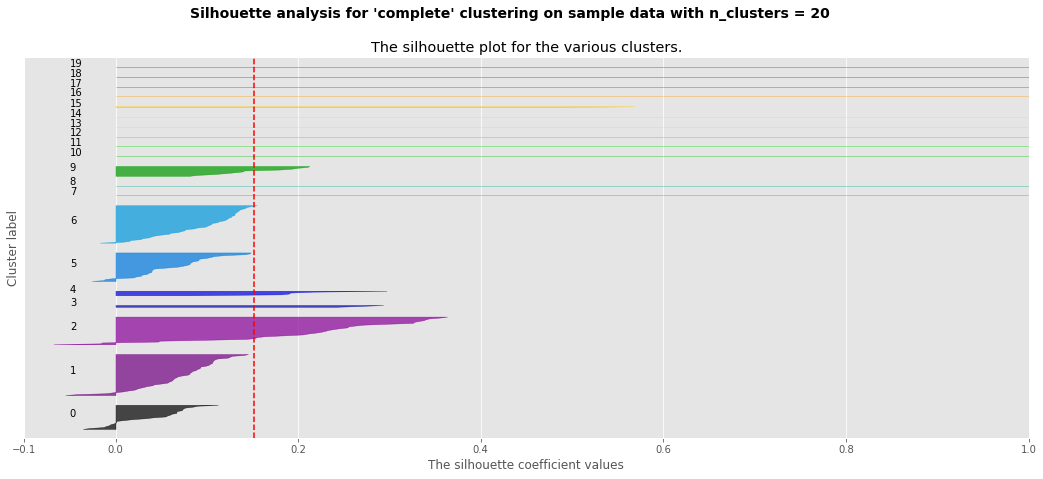

('For n_clusters =', 21, 'The average silhouette_score is :', 0.15662431389636877)


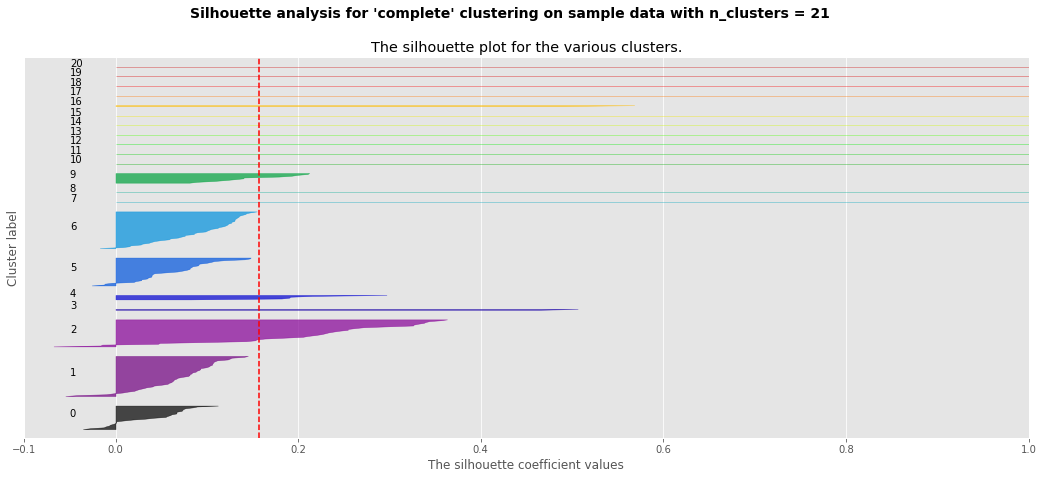

('For n_clusters =', 22, 'The average silhouette_score is :', 0.15834154100574951)


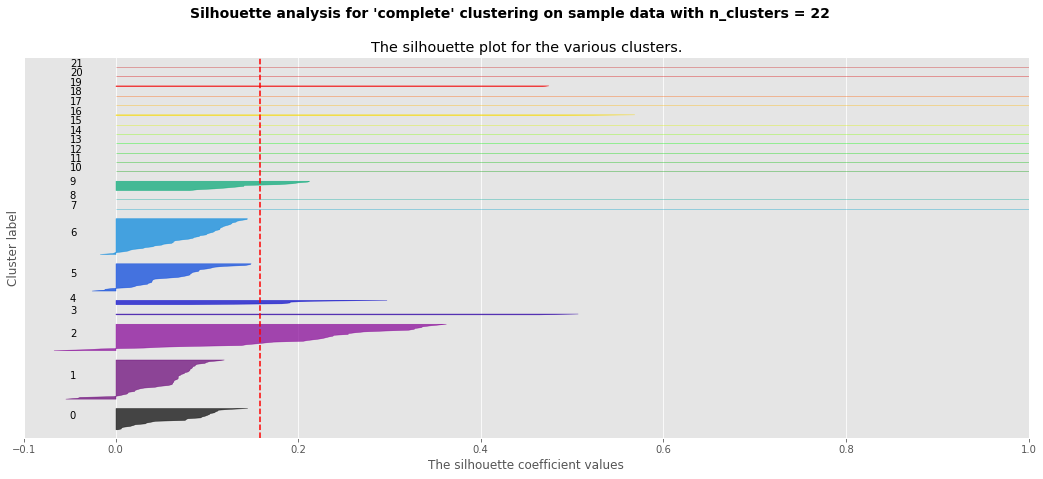

('For n_clusters =', 23, 'The average silhouette_score is :', 0.1647433835886816)


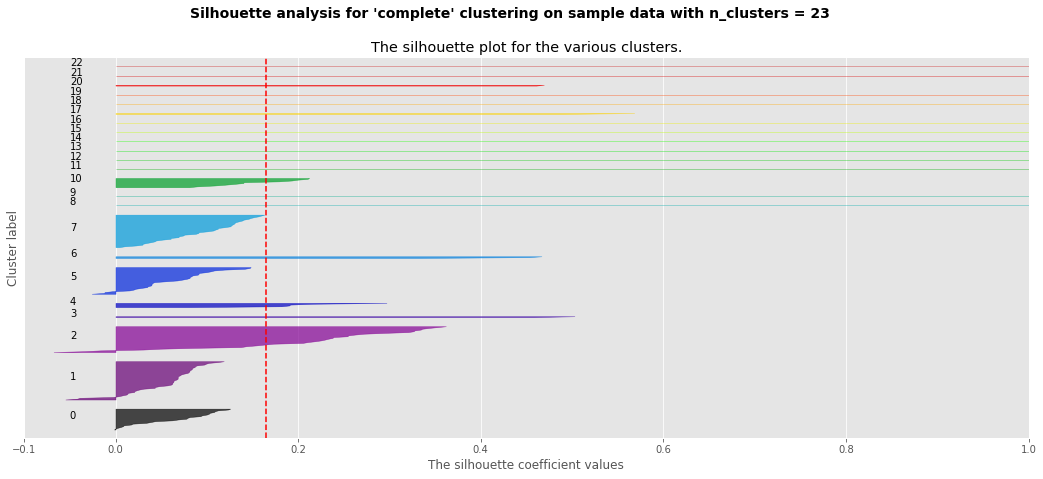

('For n_clusters =', 24, 'The average silhouette_score is :', 0.1681717922943253)


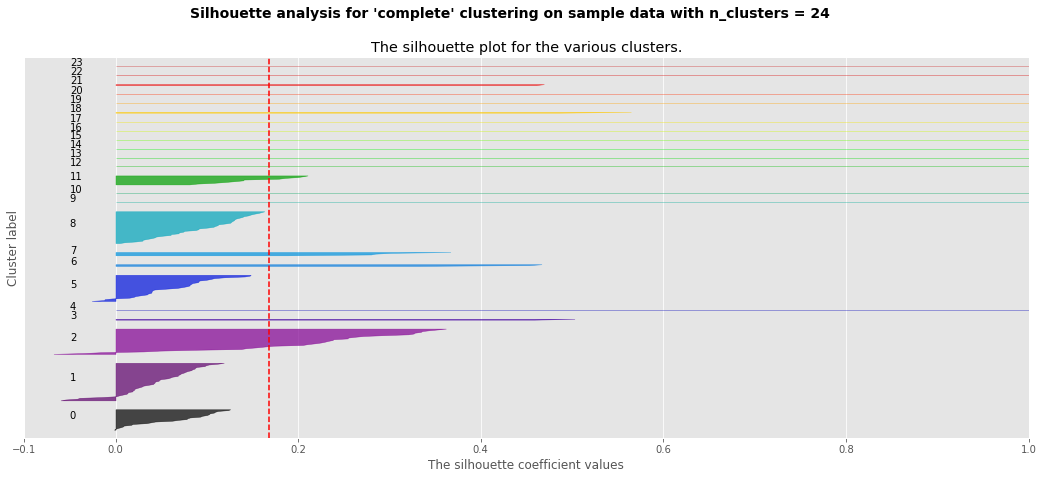

('For n_clusters =', 25, 'The average silhouette_score is :', 0.15971575114996131)


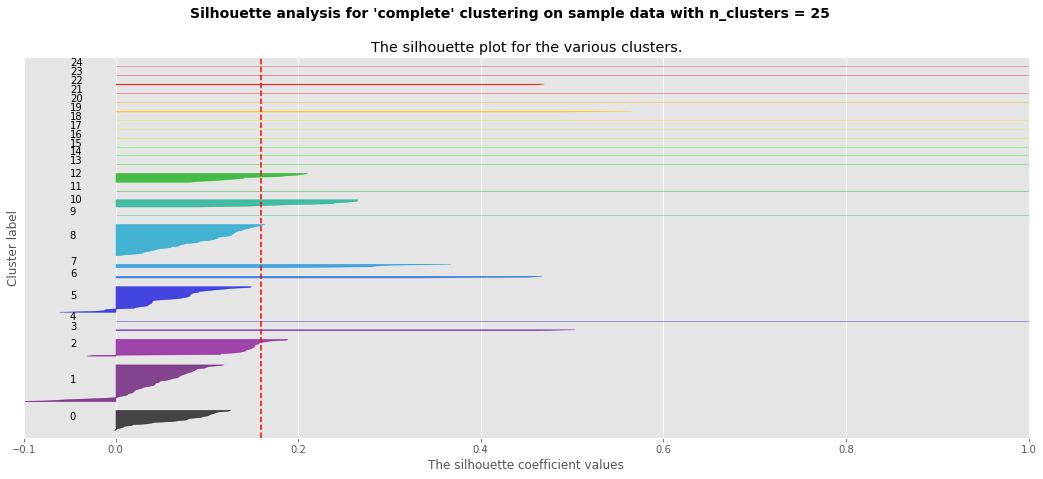

In [25]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = Clustering(n_clusters=n_clusters, linkage='complete')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = quality_mean(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = quality(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for 'complete' clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.